# Use k-NN classifier to classify the new data without libraries

**Step 1: Build the function for classifing the new data using K-NN**

**Step 2: Use the inbuilt Sckit KNN classifier to predict the result**

**Step 3: Compare results for both: self-build knn function and Knn Classifier**


# Step 1: Build Custom Knn model to predict the result

# 1. Import Necessary Libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # necessary to reduce biases of large numbers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score 

In [43]:
dataset = pd.read_csv("/kaggle/input/knn-diabetes/diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 2. Divide the data in training and testing samples

In [14]:
data = dataset.loc[:, dataset.columns.drop('Outcome')]
print(data)
labels = dataset['Outcome']
print(labels)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


**Dividing the dataset as: 20% of rows are used as testing data**

In [16]:
n_test_samples = int(len(dataset) * 0.2)     # number of test samples
learn_data = data[:-n_test_samples]
learn_labels = labels[:-n_test_samples]
test_data = data[-n_test_samples:]
test_labels = labels[-n_test_samples:]
print("learn_data:", len(learn_data))
print("learn_labels:", len(learn_labels))
print("test_data:", len(test_data))
print("leartest_labelsn_labels:", len(test_labels))

**Calculate the length of 'k': choosing square root of size of train data**

In [39]:
k = int(len(learn_data) ** 0.5)
k

24

# 3. Find the nearest neighbors

**Function to calculate the distance between the 2 points using Eucledian distance**

In [28]:
def distance(instance1, instance2):
    return np.linalg.norm(np.subtract(instance1, instance2))

4.47213595499958
121.10535136400868


**The function get_neighors calculates a list of the k nearest neighbors. It returns a list of k 3-tuples. Each 3-tuples consists of (index, dist, label) where**

*     index    is the index from the training_set, 
*     dist     is the distance between the test_instance and the instance training_set[index]
*     distance is a reference to a function used to calculate the distances

In [33]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance):
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set.iloc[index])
        distances.append((training_set.iloc[index], dist, labels.iloc[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [45]:
for i in range(len(test_data)):
    neighbors = get_neighbors(learn_data, learn_labels, test_data.iloc[i], k, distance=distance)
    neighbor_labels = [neighbor[2] for neighbor in neighbors]  # Extract neighbor labels
    print("Index:         ", i, '\n',
          "Testset Label: ", test_labels.iloc[i], '\n',
          "Neighbors:      ", neighbor_labels, '\n')

Index:          0 
 Testset Label:  0 
 Neighbors:       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0] 

Index:          1 
 Testset Label:  0 
 Neighbors:       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1] 

Index:          2 
 Testset Label:  0 
 Neighbors:       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 

Index:          3 
 Testset Label:  1 
 Neighbors:       [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0] 

Index:          4 
 Testset Label:  1 
 Neighbors:       [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0] 

Index:          5 
 Testset Label:  0 
 Neighbors:       [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0] 

Index:          6 
 Testset Label:  0 
 Neighbors:       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Index:          7 
 Testset Label:  0 
 Neighbors:       [1, 1, 1, 1, 1, 1, 

# 4. Predict the label by their neighbors

**The function: calculate_distance, calculates the distance between 2 points, finds the probability of the output and predicts the result from the nearest neighbors values**

In [53]:
from collections import Counter

def calculate_distance(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        dist = neighbors[index][1]
        label = neighbors[index][2]
        class_counter[label] += 1 / (dist**2 + 1)
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [57]:
# Initialize a list to store predicted labels
predicted_labels = []

for i in range(n_test_samples):
    neighbors = get_neighbors(learn_data, learn_labels, test_data.iloc[i], k, distance=distance)
    result = calculate_distance(neighbors, all_results=True)
    predicted_label = result[0]
    predicted_labels.append(predicted_label)
    formatted_result = {label: round(vote, 3) for label, vote in result[1]}
    print(f"Index: {i}, Predicted Label: {predicted_label}, Nearest Neighbors: {formatted_result}")

Index: 0, Predicted Label: 0, Nearest Neighbors: {0: 0.716, 1: 0.284}
Index: 1, Predicted Label: 0, Nearest Neighbors: {0: 0.807, 1: 0.193}
Index: 2, Predicted Label: 0, Nearest Neighbors: {0: 0.968, 1: 0.032}
Index: 3, Predicted Label: 0, Nearest Neighbors: {0: 0.608, 1: 0.392}
Index: 4, Predicted Label: 0, Nearest Neighbors: {0: 0.554, 1: 0.446}
Index: 5, Predicted Label: 0, Nearest Neighbors: {0: 0.587, 1: 0.413}
Index: 6, Predicted Label: 0, Nearest Neighbors: {0: 0.914, 1: 0.086}
Index: 7, Predicted Label: 1, Nearest Neighbors: {1: 0.921, 0: 0.079}
Index: 8, Predicted Label: 0, Nearest Neighbors: {0: 0.836, 1: 0.164}
Index: 9, Predicted Label: 0, Nearest Neighbors: {0: 0.847, 1: 0.153}
Index: 10, Predicted Label: 0, Nearest Neighbors: {0: 0.932, 1: 0.068}
Index: 11, Predicted Label: 0, Nearest Neighbors: {0: 0.633, 1: 0.367}
Index: 12, Predicted Label: 0, Nearest Neighbors: {0: 0.617, 1: 0.383}
Index: 13, Predicted Label: 1, Nearest Neighbors: {1: 0.631, 0: 0.369}
Index: 14, Predi

# 5. Calculate the accuracy of the result

**Calculate the Accuracy of the result**

In [59]:
correct_predictions = sum(1 for i in range(n_test_samples) if predicted_labels[i] == test_labels.iloc[i])
accuracy = correct_predictions / n_test_samples

print("Accuracy:", accuracy*100)


Accuracy: 73.8562091503268


# Step 2: Use KNN Library to predict the output

**Transform the data into scalar**

In [67]:
scaler = StandardScaler() 
x_train = scaler.fit_transform(learn_data) #  transform
y_train = learn_labels
x_test = scaler.transform(test_data) #  transform
y_test = test_labels
print("x_train:", x_train)
print("x_test:", x_test)


x_train: [[ 0.65218839  0.84277421  0.17715826 ...  0.21380506  0.43319642
   1.42490668]
 [-0.83887428 -1.086291   -0.12931806 ... -0.66513955 -0.38742276
  -0.1889379 ]
 [ 1.24861345  1.9144771  -0.23147683 ... -1.07949916  0.56699303
  -0.10399871]
 ...
 [ 0.95040092  1.45517586  0.99442844 ...  0.79139724  0.90891769
   0.5755148 ]
 [ 0.65218839 -0.47388934  0.58579335 ...  0.0756852   1.17948416
  -0.61363385]
 [ 2.14325106  0.53657338  0.27931703 ...  0.52771386  0.22506837
   1.42490668]]
x_test: [[-0.24244921 -0.44326926  0.17715826 ... -0.76559036 -0.81557189
  -0.52869466]
 [ 0.65218839 -0.10644835  1.40306353 ... -0.40145617 -0.96423479
  -0.27387709]
 [-0.54066175 -1.6068324  -0.3336356  ... -1.48130241 -0.666909
  -0.86845141]
 ...
 [ 0.35397585  0.01603198  0.17715826 ... -0.71536496 -0.70258809
  -0.27387709]
 [-0.83887428  0.16913239 -0.43579437 ... -0.22566724 -0.39336927
   1.17008912]
 [-0.83887428 -0.84133034  0.07499949 ... -0.18799819 -0.49446004
  -0.86845141]]


**Use Scikit's knn library to predict the output and calculate its accuracy**

In [68]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, learn_labels)
knn_Y_pred = knn.predict(x_test)
acc_knn_train = round(knn.score(x_train, y_train) * 100, 2)
print("Training Score: ", acc_knn_train)
acc_knn_test = round(knn.score(x_test, y_test) * 100, 2)
print("Testing Score: ", acc_knn_test)

Training Score:  76.75
Testing Score:  75.16


# Step 3: Comapre the results for custom K-Nearest Neighbors (KNN) implementation with the built-in scikit-learn KNN classifier

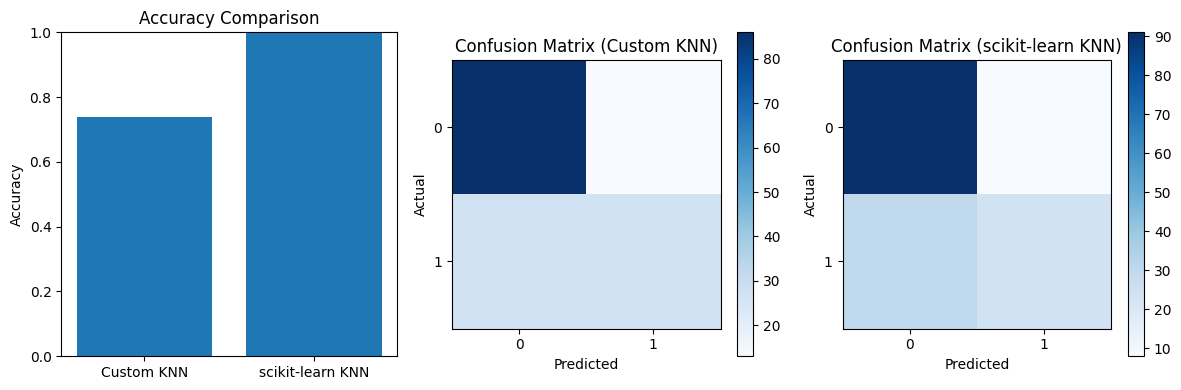

Custom KNN Classification Report:
              precision    recall  f1-score     support
0              0.761062  0.868687  0.811321   99.000000
1              0.675000  0.500000  0.574468   54.000000
accuracy       0.738562  0.738562  0.738562    0.738562
macro avg      0.718031  0.684343  0.692894  153.000000
weighted avg   0.730687  0.738562  0.727726  153.000000

scikit-learn KNN Classification Report:
              precision    recall  f1-score     support
0              0.752066  0.919192  0.827273   99.000000
1              0.750000  0.444444  0.558140   54.000000
accuracy       0.751634  0.751634  0.751634    0.751634
macro avg      0.751033  0.681818  0.692706  153.000000
weighted avg   0.751337  0.751634  0.732285  153.000000


In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Your custom KNN results
custom_accuracy = accuracy
custom_cm = confusion_matrix(test_labels, predicted_labels)

# scikit-learn KNN results
sklearn_accuracy = acc_knn_test
sklearn_cm = confusion_matrix(y_test, knn_Y_pred)

# Visualize the results
plt.figure(figsize=(12, 4))

# Accuracy Comparison
plt.subplot(1, 3, 1)
plt.bar(['Custom KNN', 'scikit-learn KNN'], [custom_accuracy, sklearn_accuracy])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Confusion Matrix Comparison
plt.subplot(1, 3, 2)
plt.title('Confusion Matrix (Custom KNN)')
plt.imshow(custom_cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.colorbar()
plt.xticks(range(len(custom_cm)), range(len(custom_cm)))
plt.yticks(range(len(custom_cm)), range(len(custom_cm)))
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
plt.title('Confusion Matrix (scikit-learn KNN)')
plt.imshow(sklearn_cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.colorbar()
plt.xticks(range(len(sklearn_cm)), range(len(sklearn_cm)))
plt.yticks(range(len(sklearn_cm)), range(len(sklearn_cm)))
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Calculate classification report for both models
custom_classification_report = classification_report(test_labels, predicted_labels, output_dict=True)
sklearn_classification_report = classification_report(y_test, knn_Y_pred, output_dict=True)

# Convert classification reports to DataFrames
custom_report_df = pd.DataFrame(custom_classification_report).transpose()
sklearn_report_df = pd.DataFrame(sklearn_classification_report).transpose()

# Display the classification reports in a table format
print("Custom KNN Classification Report:")
print(custom_report_df)

print("\nscikit-learn KNN Classification Report:")
print(sklearn_report_df)